![Astrofisica Computacional](../logo.PNG)

---
## 28. Diferencias Finitas. Diferenciación


Eduard Larrañaga (ealarranaga@unal.edu.co)

---



### Resumen

En este cuaderno se presentará el esquema de las diferencias finitas para calcular derivadas. 

---

### Discretización de una Función Suave

Considere una función suave $f(x)$ en un intervalo finito $[a,b]$. Para repesentar numéricamente esta función, debemos dividir el intervalo mediante una malla con $N-1$ intervalos igualmente espaciados o equivalentemente, utilizando $N$ nodos y evaluar allí la función. Este proceso se denomina *discretizar* la función. \

Existen diversos métodos de discretización con mallas (y también existen métodos de discretizaciónen los cuales las funciones continuas se representan sin una malla y en su lugar, utilizando bases de funciones tales como los senos o los cosenos. Estos se denominan *métodos espectrales*).

Alguno de los métodos basados en mallas utilizan las denominadas *mallas estructuradas*, en las cuales se utilizan coordenadas cartesianas (i.e. mallas rectangulares) y dentro de ellos podemos nombrar

- Diferencias-Finitas
- Volumenes-Finitos
- Elementos-Finitos

Por otra parte, los métodos con *mallas no-estructuradas* utilizan otro tipo de coordenadas o estan basados en celdas con formas triangulares o con tetraedros.  Este tipo de celdas no-rectangulares permite representar dominios con formas irregulares pero su manejo es mas complejo.

#### Método de Diferencias Finitas

El primer método que utilizaremos es el **Diferencias Finitas** en el cual se considerará una malla rectangular basada en las coordenadas cartesianas. De esta forma, el dominio se discretizará con una malla con $N-1$ intervalos igualmente espaciados (la distancia entre cualquier par consecutivo de puntos es el mismo) o equivalentemente mediante $N$ puntos (nodos). Los datos discretos que representarán la función se obtienen al evaluar en algunos puntos específicos. En la siguiente figura se puede observar dos elecciones posibles. En una de ellas, la función se evalua en cada nodo mientras que en la otra, la función se evalua en los puntos medios de cada intervalo.

<center> <img src="https://i.ibb.co/XZtDysv/Finite-Differences.png" alt="Finite-Differences" border="0">
</center>

---
Por ejemplo, conisdere la función $\sin x$ en el intervalo $[0,2\pi]$. Crearemos una malla en este dominio y obtendremos los puntos para evaluar la función y poder graficarla. Es claro que dependiendo el tamaño de la malla, se obtendra una mejor o peor representación gráfica de la función.

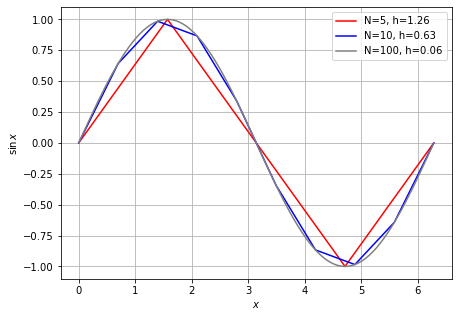

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

def f(x):
    return np.sin(x)

# Interval
a = 0.
b = 2*np.pi

# Number of points in the grid
N1 = 5 
N2 = 10
N3 = 100

# Grid size
h1 = (b-a)/N1 
h2 = (b-a)/N2 
h3 = (b-a)/N3 

x_grid1= np.linspace(a, b, N1)
x_grid2= np.linspace(a, b, N2)
x_grid3= np.linspace(a, b, N3)

plt.figure(figsize=(7,5))
plt.plot(x_grid1, f(x_grid1),color='red', label=f'N={N1:.0f}, h={h1:.2f}')
plt.plot(x_grid2, f(x_grid2),color='blue', label=f'N={N2:.0f}, h={h2:.2f}')
plt.plot(x_grid3, f(x_grid3),color='grey', label=f'N={N3:.0f}, h={h3:.2f}')

plt.xlabel(r'$x$')
plt.ylabel(r'$\sin x$')
plt.grid()
plt.legend()
plt.show()

---
### Derivada Numérica de una Función Analítica con Diferencias Finitas

Dada una función analítica $f(x)$, podemos escribir su expansión en serie de Taylor alrededor de un punto $x=x_0$ como

$f(x_0 + \Delta x) = \sum_{n=0}^\infty \frac{f^{(n)} (x_0)}{n!} \Delta x ^n = f(x_0) +
 f'(x_0) \Delta x +f''(x_0) \frac{\Delta x^2}{2}  + f'''(x_0) \frac{\Delta x^3}{6} + ...$
 
Truncando la serie a segundo orden e introduciendo la cantidad $h=\Delta x$ tenemos

$f(x_0 + h) = f(x_0) +  f'(x_0) h+ \mathcal{O}(h^2)$,

donde se obtiene una aproximación a primer orden hacia adelante de la primera derivada de la función:

$f'(x_0) = \frac{f(x_0+h) - f(x_0)}{h} + \mathcal{O}(h)$   : (*Forward Difference Derivative*)


De forma similar, es posible obtener una aproximación a primer orden hacia atras de la primera derivada de la función:

$f'(x_0) = \frac{f(x_0) -f(x_0-h)}{h} + \mathcal{O}(h)$   : (*Backward Difference Derivative*)
 

Combinando estas dos relaciones, se obtiene una aproximación a segundo orden centrada de la primera derivada de la función:
 
$f'(x_0) = \frac{f(x_0 + h) -f(x_0-h)}{2h} + \mathcal{O}(h^2)$   : (*Central Difference Derivative*)

En la siguiente figura se representan las tres posibilidades de derivada numérica:

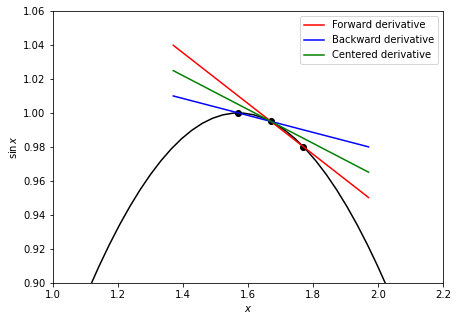

In [2]:
import numpy as np
import matplotlib.pyplot as plt

def f(x):
    return np.sin(x)

def forwardDerivative(f, x, h):
    return (f(x + h) - f(x))/h

def backwardDerivative(f, x, h):
    return (f(x) - f(x - h))/h

def centeredDerivative(f, x, h):
    return (f(x + h) - f(x - h))/(2*h)

# To draw a staright line defined by the numerical derivatives
def straight_line(x_0, y_0, m, x):
    y = y_0 + m*(x - x_0)
    return y

# Point to calculate the derivative
x_0 = np.pi/2 +0.1
y_0 = f(x_0)

# Step size in the derivative
h = 0.1

# Points involved in the numerical derivatives
points_x = [x_0-h, x_0, x_0+h]
points_y = [f(x_0-h), y_0, f(x_0+h)]

# Numerical derivatives
f_dfdx = forwardDerivative(f, x_0, h) 
b_dfdx = backwardDerivative(f, x_0, h) 
c_dfdx = centeredDerivative(f, x_0, h)

# x-Ranges to plot function and straight lines
x = np.linspace(0, np.pi, 100)
xline = np.linspace(x_0-0.3, x_0+0.3, 50) 

plt.figure(figsize=(7,5))
plt.plot(x, f(x), 'k')
plt.scatter(points_x, points_y, color='black')
plt.plot(xline, straight_line(x_0, y_0, f_dfdx, xline), 'r', label='Forward derivative')
plt.plot(xline, straight_line(x_0, y_0, b_dfdx, xline), 'b', label='Backward derivative')
plt.plot(xline, straight_line(x_0, y_0, c_dfdx, xline), 'g', label='Centered derivative')

plt.xlim(1.,2.2)
plt.ylim(0.9,1.06)
plt.xlabel(r'$x$')
plt.ylabel(r'$\sin x$')
plt.legend()
plt.show()


Una de las preguntas más frecuente es, cómo se escoge el valor de $h$? La teoría del cálculo no indica que deberiamos tomar $h \rightarrow 0$. Sin embargo, debido al error de redondeo y a la precisión de la máquina tomar este límite no es una buena idea para los calculos numéricos.

Como un ejemplo, considere la función $\sin x$ y su derivada en el punto $x=\frac{\pi}{2}$. A continuación calcularemos la derivada utilizando diferentes valores de $h$ y compararemos los resultados con la derivada analítica,

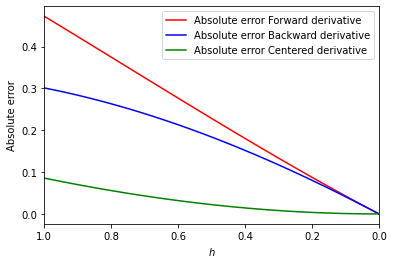

In [3]:
import numpy as np
import matplotlib.pyplot as plt

def f(x):
    return np.sin(x)

def dfdx(x):
    return np.cos(x)

def forwardDerivative(f, x, h):
    return (f(x + h) - f(x))/h

def backwardDerivative(f, x, h):
    return (f(x) - f(x - h))/h

def centeredDerivative(f, x, h):
    return (f(x + h) - f(x - h))/(2*h)


x = 1.

h_max = 1 
h_min = 1E-12
h = np.linspace(h_min, h_max, 100)

f_dfdx = forwardDerivative(f, x, h) 
b_dfdx = backwardDerivative(f, x, h) 
c_dfdx = centeredDerivative(f, x, h)

abs_error_f = np.abs(dfdx(x) - f_dfdx)
abs_error_b = np.abs(dfdx(x) - b_dfdx)
abs_error_c = np.abs(dfdx(x) - c_dfdx)

plt.figure()
plt.plot(h, abs_error_f, 'r', label='Absolute error Forward derivative')
plt.plot(h, abs_error_b, 'b', label='Absolute error Backward derivative')
plt.plot(h, abs_error_c, 'g', label='Absolute error Centered derivative')

plt.xlabel(r'$h$')
plt.ylabel(r'Absolute error')
plt.xlim(h_max, h_min)
plt.legend()
plt.show()


Como se puede observar, al parecer un valor muy pequeño de $h$ hace que las tres derivadas den el valor correcto (el error absoluto tiende a cero). Sin embargo, un zoom en la región de $h$ muy pequeños muestra un comportamiento interesante,

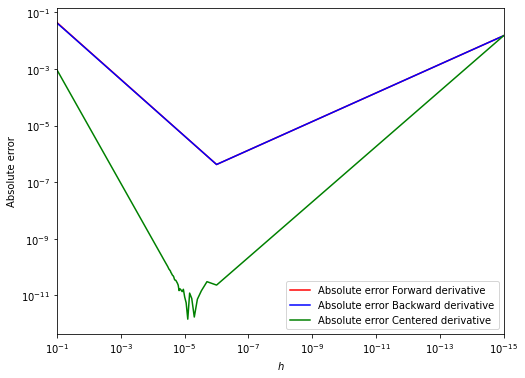

In [4]:
x = 1.

h_max = 1E-1 
h_min = 1E-15
h = np.linspace(h_min, h_max, 100000)

f_dfdx = forwardDerivative(f, x, h) 
b_dfdx = backwardDerivative(f, x, h) 
c_dfdx = centeredDerivative(f, x, h)

abs_error_f = np.abs(dfdx(x) - f_dfdx)
abs_error_b = np.abs(dfdx(x) - b_dfdx)
abs_error_c = np.abs(dfdx(x) - c_dfdx)

plt.figure(figsize=(8,6))
plt.loglog(h, abs_error_f, 'r' ,label='Absolute error Forward derivative')
plt.loglog(h, abs_error_b, 'b', label='Absolute error Backward derivative')
plt.loglog(h, abs_error_c, 'g', label='Absolute error Centered derivative')

plt.xlabel(r'$h$')
plt.ylabel(r'Absolute error')
plt.xlim(h_max, h_min)
plt.legend()
plt.show()

El error absoluto asociado con los tres métodos numéricos presentan un mínimo y luego vuelven a aumentar. Otro acercamiento permite localizar mejor la ubicación del mínimo,

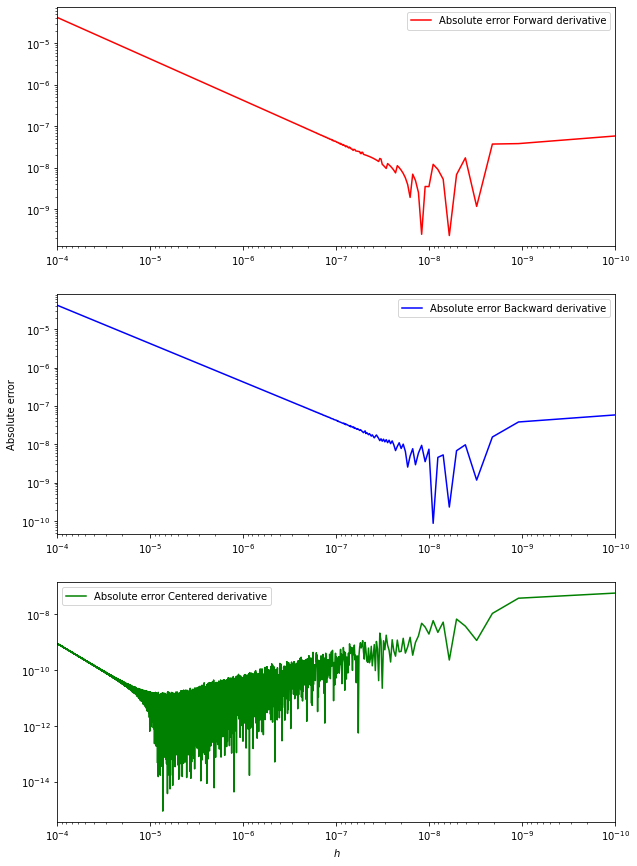

In [5]:
x = 1.

h_max = 1E-4 
h_min = 1E-10
h = np.linspace(h_min, h_max, 100000)

f_dfdx = forwardDerivative(f, x, h) 
b_dfdx = backwardDerivative(f, x, h) 
c_dfdx = centeredDerivative(f, x, h)

abs_error_f = np.abs(dfdx(x) - f_dfdx)
abs_error_b = np.abs(dfdx(x) - b_dfdx)
abs_error_c = np.abs(dfdx(x) - c_dfdx)

plt.figure(figsize=(10,15))
plt.subplot(3,1,1)
plt.loglog(h, abs_error_f, color='red', label='Absolute error Forward derivative')
plt.xlim(h_max, h_min)
plt.legend()

plt.subplot(3,1,2)
plt.loglog(h, abs_error_b, color='blue',label='Absolute error Backward derivative')
plt.ylabel(r'Absolute error')
plt.xlim(h_max, h_min)
plt.legend()

plt.subplot(3,1,3)
plt.loglog(h, abs_error_c, color='green', label='Absolute error Centered derivative')
plt.xlim(h_max, h_min)
plt.legend()

plt.xlabel(r'$h$')
plt.xlim(h_max, h_min)
plt.show()

#### Selección del parámetro $h$

En las graficas anteriores, se ilustra una regla común para la selección del parámetro $h$, en la cual se sugiere tomar la raiz cuadrada del epsilon de la máquina,

$h \sim \sqrt{\epsilon}$

Ya que determinamos antes que $\epsilon \sim 10^{-16}$, tomaremos $h\sim 10^{-8}$.

##### Ejemplo
En este ejemplo se calcula la derivada numérica de la función $\sin x$ en un rango de la variable $x$ y se compara con el valor de la derivada analítica.

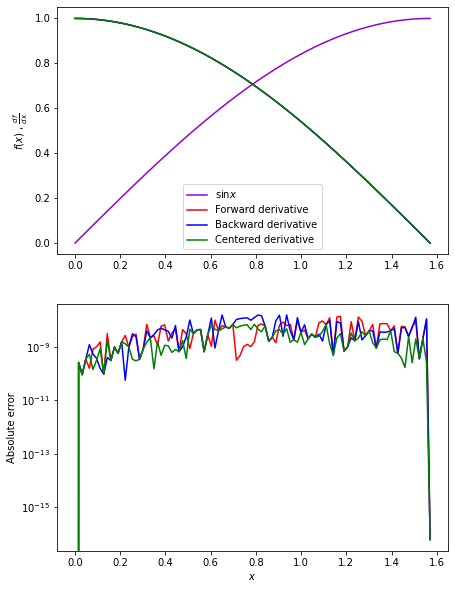

In [14]:
import numpy as np
import matplotlib.pyplot as plt

def f(x):
    return np.sin(x)

def dfdx(x):
    return np.cos(x)

def forwardDerivative(f, x, h=1e-8):
    return (f(x + h) - f(x))/h

def backwardDerivative(f, x, h=1e-8):
    return (f(x) - f(x - h))/h

def centeredDerivative(f, x, h=1e-8):
    return (f(x + h) - f(x - h))/(2*h)


x = np.linspace(0, np.pi/2, 100)
function = f(x)
f_dfdx = forwardDerivative(f, x) 
b_dfdx = backwardDerivative(f, x) 
c_dfdx = centeredDerivative(f, x) 

abs_error_f = np.abs(f_dfdx - dfdx(x))
abs_error_b = np.abs(b_dfdx - dfdx(x))
abs_error_c = np.abs(c_dfdx - dfdx(x))

plt.figure(figsize=(7,10))
plt.subplot(2,1,1)
plt.plot(x, function, color='darkviolet', label=r'$\sin x$')
plt.plot(x, f_dfdx, 'r', label=r'Forward derivative')
plt.plot(x, b_dfdx, 'b', label=r'Backward derivative')
plt.plot(x, c_dfdx, 'g', label=r'Centered derivative')
plt.ylabel(r'$f(x)$ , $\frac{df}{dx}$' )
plt.legend()

plt.subplot(2,1,2)
plt.plot(x, abs_error_f, 'r', label=r'Forward derivative')
plt.plot(x, abs_error_b, 'b', label=r'Backward derivative')
plt.plot(x, abs_error_c, 'g', label=r'Centered derivative')
plt.yscale('log')
plt.ylabel(r'Absolute error')

plt.xlabel(r'$x$')
plt.show()


Note que el error absoluto en la derivada numérica nunca es mayor que $10^{-8}$

---
### Diferenciación en los puntos frontera de un intervalo. 

Considere una malla igualmente espaciada definiendo un dominio $[x_1, x_2, ..., x_j, ...,x_n] $. En cualquiera de los puntos internos de este intervalo, se puede calcular la primera derivada de una función mediante las diferencias finitas hacia adelante o hacia atras,

$f'(x_i) = \frac{f_{i+1} - f_{i}}{h} + \mathcal{O}(h) $

$f'(x_i) = \frac{f_i - f_{i-1}}{h} + \mathcal{O}(h) $

y también con la aproximación a segundo orden centrada,

$f'(x_i) = \frac{f_{i+1} - f_{i-1}}{2h} + \mathcal{O}(h^2) .$

Sin embargo, debe notarse que ne el punto $x=x_n$ no es posible utilizar la derivada hacia adelante mientras que en el punto $x=x_1$ no es posible utilizar la derivada hacia atrás. De forma similar, la derivada centrada no puede utilizarse en ninguno de estos dos puntos forntera del dominio.

---
### Diferencias Finitas en una Malla con Intervalos Desiguales

En algunas aplicaciones de la astrofísica es adecuado utilizar una malla con intervalos desiguales para describir con mayor precisión el sistema. 

En este caso, las derivadas unlaterales (hacia adelante o hacia atras) no se modifican debido a que solamente incluyen un intervalo (dos puntos consecuticos) y por lo tanto un solo valor de $h$.

Por otra parte, la derivada centrada involucra tres puntos, es decir dos intervalos y por lo tanto dos valores de $h$. Para obtener una expresión para esta derivada de segundo orden se consideran las siguientes expansiones en serie de la función,

$f(x_i + h_2) = f(x_i) + f'(x_i)  h_2 + f''(x_i) \frac{h_2^2}{2}  +
\mathcal{O}(h_2^3)$

$f(x_i - h_1) = f(x_i) - f'(x_i)h_1  + f''(x_i) \frac{h_1^2}{2}  +
\mathcal{O}(h_1^3)$,

donde $h_1 = x_i - x_{i-1}$ y $h_2 = x_{i+1} - x_{i}$. Restando estas ecuaciones y eliminando el término de segunda derivada se puede despejar el valor de $f'(x_i)$ en la forma

$f'(x_i) = \frac{h_1}{h_2(h_1+h_2)} f(x_{i+1}) - \frac{h_1 - h_2}{h_2 h_1} f(x_i)
- \frac{h_2}{h_1(h_1 + h_2)} f(x_{i-1})$.

Es claro que esta expresión se reduce a la derivada centrada en una malla igualmente espaciada cuando $h_1 = h_2$.

---
### Diferenciación Numérica de una Función Discreta

Ahora se implemenará un algoritmo para calcular la derivada numérica de una función que se proporciona mediante un conjunto de puntos discretos en un archivo .txt.

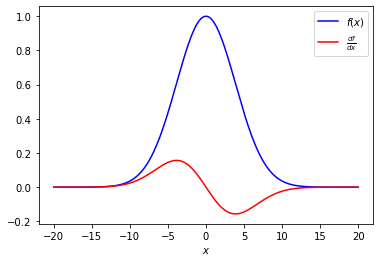

In [6]:
import numpy as np
import matplotlib.pyplot as plt


def Derivative(x, f):
    '''
    ------------------------------------------
    This function returns the numerical 
    derivative of a discretely-sample function 
    using one-side derivatives in the extreme 
    points of the interval and second order 
    accurate derivative in the middle points.
    The data points may be evenly or unevenly
    spaced.
    ------------------------------------------
    '''
    # Number of points
    N = len(x)
    dfdx = np.zeros([N, 2])
    dfdx[:,0] = x
    
    # Derivative at the extreme points
    dfdx[0,1] = (f[1] - f[0])/(x[1] - x[0])
    dfdx[N-1,1] = (f[N-1] - f[N-2])/(x[N-1] - x[N-2])
    
    #Derivative at the middle points
    for i in range(1,N-1):
        h1 = x[i] - x[i-1]
        h2 = x[i+1] - x[i]
        dfdx[i,1] = h1*f[i+1]/(h2*(h1+h2)) - (h1-h2)*f[i]/(h1*h2) -\
                    h2*f[i-1]/(h1*(h1+h2))
    
    return dfdx

# Loading the data
data = np.loadtxt('function_data.txt', comments='#', delimiter=',')
x = data[:,0]
f = data[:,1]

# Calling the derivative function
dfdx_data = Derivative(x,f)

plt.plot(x, f, 'b', label=r'$f(x)$')
plt.plot(dfdx_data[:,0], dfdx_data[:,1], 'r', label=r'$\frac{df}{dx}$')
plt.xlabel(r'$x$')
plt.legend()
plt.show()


---
### Convergencia del Método Numérico

#### 1. Cuando la solución analítica es conocida

Si un problema astrofísico posee una solución analítica $Y(x)$ y un cierto algoritmo da como resultado una solución numérica $y(x;h)$, se dice que el método numérico es **convergente** si

$\lim_{h\rightarrow 0} y(x;h) = Y(x)$.

Para medir la convergencia del método numérico, se introducirá el **factor de convergencia**, $C$, como

$C = \frac{\left| y(x:h_2) - Y(x) \right|}{\left| y(x:h_1) - Y(x) \right|} \equiv \left(\frac{h_2}{h_1} \right)^n$

donde se han escogido dos tamaños de discretización $h_2 < h_1$. Cuando $C<1$, el método numérico es convergente y, debido a la ultima identificación, el número $n$ corresponde al orden de precisión del método.

Por ejemplo, si se toman los valores de discretización tales que $\frac{h_2}{h_1} = 10^{-1}$, se obtiene

$C \equiv \left(\frac{h_2}{h_1} \right)^n = (10^{-1})^n = 10^{-n}$

y por lo tanto, el orden de precisión del método será $n=-\log_{10} C$.

##### Ejemplo

In [8]:
import numpy as np
import matplotlib.pyplot as plt

def f(x):
    return np.sin(x)

def dfdx(x):
    return np.cos(x)

def forwardDerivative(f, x, h=1e-8):
    return (f(x + h) - f(x))/h

def centeredDerivative(f, x, h=1e-8):
    return (f(x + h) - f(x - h))/(2*h)

x_0 = 1.
h1 = 1E-3
h2 = 1E-4

# Forward Derivative Convergence Test
y_1 = forwardDerivative(f, x_0, h1)
y_2 = forwardDerivative(f, x_0, h2)

C_forward = np.abs(y_2 - dfdx(x_0))/np.abs(y_1 - dfdx(x_0))

print('Para la derivada hacia adelante:')
print(f'Para h1 = {h1:.1e} y h2 = {h2:.1e}' )
print(f'el factor de convergencia es C = {C_forward:.2f}')
print(f'que corresponde a n = {-np.log10(C_forward):.1f}')


# Centered Derivative Convergence Test
y_1 = centeredDerivative(f, x_0, h1)
y_2 = centeredDerivative(f, x_0, h2)

C_centered = np.abs(y_2 - dfdx(x_0))/np.abs(y_1 - dfdx(x_0))

print('')
print('Para la derivada centrada:')
print(f'Para h1 = {h1:.1e} y h2 = {h2:.1e}' )
print(f'el factor de convergencia es C = {C_centered:.2f}')
print(f'que corresponde a n = {-np.log10(C_centered):.1f}')

Para la derivada hacia adelante:
Para h1 = 1.0e-03 y h2 = 1.0e-04
el factor de convergencia es C = 0.10
que corresponde a n = 1.0

Para la derivada centrada:
Para h1 = 1.0e-03 y h2 = 1.0e-04
el factor de convergencia es C = 0.01
que corresponde a n = 2.0


#### 2. Cuando la solución analítica NO se concoce.

En muchos casos la solución analítica  $Y(x)$ NO es conocida. Entonces, como se puede realizar la prueba de convergencia del método numérico? 

En este caso se introducirán tres tamaños de discretización $h_3 < h_2 < h_1$, y se define el **factor de auto-convergencia**, $C_{self}$, 

$C_{self} = \frac{\left| y(x:h_3) - y(x:h_2) \right|}{\left| y(x:h_2) - y(x:h_1) \right|} \equiv \frac{h_3^n - h_2^n}{h_2^n - h_1^n}. $

Por ejemplo, si se toman valores tales que $\frac{h_3}{h_2} = \frac{h_2}{h_1} = 10^{-1}$ , se obtendrá 

$C_{self} \equiv \frac{10^{-n} h_2^n - h_2^n}{10^{-n}h_1^n - h_1^n} = \frac{(10^{-n}-1) h_2^n }{(10^{-n}-1)h_1^n } = \left( \frac{h_2}{h_1} \right)^n = (10^{-1})^n = 10^{-n}$

y por lo tanto el orden de precisión es $n=-\log_{10} C$.

##### Example

In [9]:
import numpy as np
import matplotlib.pyplot as plt

def f(x):
    return np.sin(x)

def forwardDerivative(f, x, h=1e-8):
    return (f(x + h) - f(x))/h

def centeredDerivative(f, x, h=1e-8):
    return (f(x + h) - f(x - h))/(2*h)

x_0 = 1.
h1 = 1E-2
h2 = 1E-3
h3 = 1E-4

# Forward Derivative Convergence Test
y_1 = forwardDerivative(f, x_0, h1)
y_2 = forwardDerivative(f, x_0, h2)
y_3 = forwardDerivative(f, x_0, h3)

C_self = np.abs(y_3 - y_2)/np.abs(y_2 - y_1)

print('Para la derivada hacia adelante:')
print(f'Para h1 = {h1:.1e}, h2 = {h2:.1e} y h3 = {h3:.1e}' )
print(f'el factor de convergencia es C = {C_self:.2f}')
print(f'que corresponde a n = {-np.log10(C_self):.1f}')


# Centered Derivative Convergence Test
y_1 = centeredDerivative(f, x_0, h1)
y_2 = centeredDerivative(f, x_0, h2)
y_3 = centeredDerivative(f, x_0, h3)

C_self = np.abs(y_3 - y_2)/np.abs(y_2 - y_1)

print('')
print('Para la derivada centrada:')
print(f'Para h1 = {h1:.1e}, h2 = {h2:.1e} y h3 = {h3:.1e}' )
print(f'el factor de convergencia es C = {C_self:.2f}')
print(f'que corresponde a n = {-np.log10(C_self):.1f}')

Para la derivada hacia adelante:
Para h1 = 1.0e-02, h2 = 1.0e-03 y h3 = 1.0e-04
el factor de convergencia es C = 0.10
que corresponde a n = 1.0

Para la derivada centrada:
Para h1 = 1.0e-02, h2 = 1.0e-03 y h3 = 1.0e-04
el factor de convergencia es C = 0.01
que corresponde a n = 2.0
